In [ ]:
# NAME:       Doruk Büyükyıldırım
# STUDENT ID: 2022719033
# DATE:       16.04.2024
# SUMMARY:    SPRING 2024 SWE582 - SWE 582: Sp. Tp. Machine Learning for Data Analytic Homework #1 Due April 16, 2024 by 23:59
#             This Python code does the following:
#             -> Load 2 different data sets* of 3-D (including bias terms) data and correstponding labels of 2 classes (minus 1 & plus 1)
#             -> Train 2 perceptrons using PLA for both datasets
#             -> Print out number of iterations, final weight vector and plot the datapoints as well as decision boundary
#             -> Train perceptrons on same dataset (small dataset) and print out final model vector each time for comparison
#             * The datasets in .npy format should be placed inside the working directory

import numpy as np
from random import choice
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_large = np.load('/content/drive/MyDrive/Colab Notebooks/swe582/hw1/q1/data_large.npy')
label_large = np.load('/content/drive/MyDrive/Colab Notebooks/swe582/hw1/q1/label_large.npy')
data_small = np.load('/content/drive/MyDrive/Colab Notebooks/swe582/hw1/q1/data_small.npy')
label_small = np.load('/content/drive/MyDrive/Colab Notebooks/swe582/hw1/q1/label_small.npy')

In [ ]:
print(data_small)

[[1.         0.45189235 0.59957181]
 [1.         0.91001106 0.18680112]
 [1.         0.93750793 0.30837864]
 [1.         0.52539138 0.71251242]
 [1.         0.54390659 0.52621951]
 [1.         0.82898973 0.65767611]
 [1.         0.76214526 0.94086615]
 [1.         0.31946905 0.76971823]
 [1.         0.84001253 0.64602548]
 [1.         0.30001648 0.43155829]
 [1.         0.22133709 0.21259815]
 [1.         0.18685655 0.71428598]
 [1.         0.3048879  0.59554887]
 [1.         0.02604406 0.3027358 ]
 [1.         0.46362387 0.26706243]
 [1.         0.01683563 0.71553149]
 [1.         0.22493797 0.70870311]
 [1.         0.27184017 0.60150974]
 [1.         0.06461731 0.66735358]
 [1.         0.09114632 0.41525583]]


In [ ]:
print(label_small)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


In [ ]:
rnd_data = [data_small,label_small]
print(rnd_data)

[array([[1.        , 0.45189235, 0.59957181],
       [1.        , 0.91001106, 0.18680112],
       [1.        , 0.93750793, 0.30837864],
       [1.        , 0.52539138, 0.71251242],
       [1.        , 0.54390659, 0.52621951],
       [1.        , 0.82898973, 0.65767611],
       [1.        , 0.76214526, 0.94086615],
       [1.        , 0.31946905, 0.76971823],
       [1.        , 0.84001253, 0.64602548],
       [1.        , 0.30001648, 0.43155829],
       [1.        , 0.22133709, 0.21259815],
       [1.        , 0.18685655, 0.71428598],
       [1.        , 0.3048879 , 0.59554887],
       [1.        , 0.02604406, 0.3027358 ],
       [1.        , 0.46362387, 0.26706243],
       [1.        , 0.01683563, 0.71553149],
       [1.        , 0.22493797, 0.70870311],
       [1.        , 0.27184017, 0.60150974],
       [1.        , 0.06461731, 0.66735358],
       [1.        , 0.09114632, 0.41525583]]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.

In [ ]:
    rnd_x = np.array([[0,1,1],\
                      [0.6,0.6,1],\
                      [1,0,1],\
                      [1,1,1],\
                      [0.3,0.4,1],\
                      [0.2,0.3,1],\
                      [0.1,0.4,1],\
                      [0.5,-0.1,1]])

    rnd_y = np.array([1,1,1,1,-1,-1,-1,-1])
    rnd_data = [rnd_x,rnd_y]
    print(rnd_data)

[array([[ 0. ,  1. ,  1. ],
       [ 0.6,  0.6,  1. ],
       [ 1. ,  0. ,  1. ],
       [ 1. ,  1. ,  1. ],
       [ 0.3,  0.4,  1. ],
       [ 0.2,  0.3,  1. ],
       [ 0.1,  0.4,  1. ],
       [ 0.5, -0.1,  1. ]]), array([ 1,  1,  1,  1, -1, -1, -1, -1])]


In [ ]:
def train_perceptron(training_data):
    '''
    Train a perceptron model given a set of training data
    :param training_data: A list of data points, where training_data[0]
    contains the data points and training_data[1] contains the labels.
    Labels are +1/-1.
    :return: learned model vector
    '''
    X = training_data[0]
    y = training_data[1]
    model_size = X.shape[1]
    w = np.zeros(model_size)#np.random.rand(model_size)
    iteration = 1
    while True:
        # compute results according to the hypothesis
        results = np.matmul(X, w)

        # get incorrect predictions (you can get the indices)
        misclassified_indices = np.where(y * results <= 0)[0]

        # Check the convergence criteria (if there are no misclassified
        # points, the PLA is converged and we can stop.)
        if len(misclassified_indices) == 0:
            break

        # Pick one misclassified example.
        misclassified_index = choice(misclassified_indices)

        # Update the weight vector with perceptron update rule
        w += y[misclassified_index] * X[misclassified_index]

        iteration += 1

    return w, iteration

def plot_decision_boundary(data, labels, model):
    '''
    Plot decision boundary given data and model
    :param data: data points
    :param model: model vector
    :return: None
    '''
    # Initialize empty arrays for each class
    class_1 = []
    class_minus_1 = []

    # Iterate over labels and data, splitting them into class_1 and class_minus_1
    for i, lbl in enumerate(labels):
        if lbl == 1:
            class_1.append(data[i])
        elif lbl == -1:
            class_minus_1.append(data[i])

    # Convert lists to numpy arrays
    class_1 = np.array(class_1)
    class_minus_1 = np.array(class_minus_1)

    plt.scatter(class_1[:, 1], class_1[:, 2], marker='o', label='Class 1', alpha=1, edgecolors='k', facecolor='r')
    plt.scatter(class_minus_1[:, 1], class_minus_1[:, 2], marker='x', label='Class -1', alpha=1, facecolor='g')

    x_min, x_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
    y_min, y_max = data[:, 2].min() - 0.2, data[:, 2].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Adjust the indices for the model vector
    Z = np.sign(np.dot(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()], model))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['green', 'red'], alpha=0.05)
    plt.legend()


Number of iterations: 58


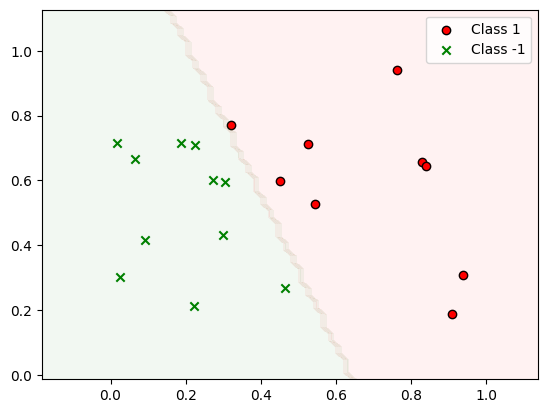

The weight vector:
[-3.          4.69897203  2.01879484]


In [ ]:
rnd_data = [data_small,label_small]

trained_model, iteration = train_perceptron(rnd_data)
print("Number of iterations: {}".format(iteration))

plot_decision_boundary(data_small, label_small, trained_model)
plt.show()
print("The weight vector:")
print(trained_model)

Number of iterations: 5046


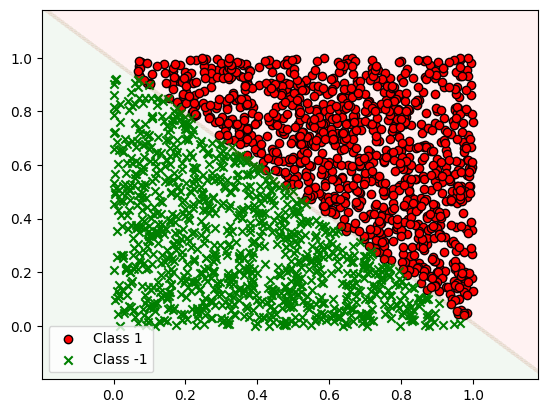

The weight vector:
[-37.          36.99205016  36.99872138]


In [ ]:
rnd_data = [data_large,label_large]

trained_model, iteration = train_perceptron(rnd_data)
print("Number of iterations: {}".format(iteration))

plot_decision_boundary(data_large, label_large, trained_model)
plt.show()
print("The weight vector:")
print(trained_model)

In [ ]:
print(len(label_large))

2000


In [ ]:
rnd_data = [data_small,label_small]

for i in range(10):
    trained_model, iteration = train_perceptron(rnd_data)
    print("Training {}: Number of iterations: {}, Model Vector: {}".format(i+1, iteration, trained_model))

Training 1: Number of iterations: 29, Model Vector: [-2.          2.76365235  1.4818286 ]
Training 2: Number of iterations: 29, Model Vector: [-2.          3.38485485  1.46395134]
Training 3: Number of iterations: 14, Model Vector: [-1.          1.71316941  0.75011373]
Training 4: Number of iterations: 31, Model Vector: [-2.          2.60547634  1.78591021]
Training 5: Number of iterations: 56, Model Vector: [-3.          4.30150455  2.29225055]
Training 6: Number of iterations: 56, Model Vector: [-3.          4.52258539  2.35213744]
Training 7: Number of iterations: 12, Model Vector: [-1.          1.33074616  0.79811759]
Training 8: Number of iterations: 25, Model Vector: [-2.          3.55333474  1.19858198]
Training 9: Number of iterations: 54, Model Vector: [-3.          5.10777443  1.8210014 ]
Training 10: Number of iterations: 79, Model Vector: [-4.          6.03017528  3.03002078]
